© 2025 Yegor Tkachenko. 

Python, Deep Learning, and LLMs: A Crash Course for Complete Beginners.

Selected code from *Chapter 3: Randomness and probabilities*.

Version: 2025-09-03. https://python2llms.org. 

In [1]:
from scipy.stats import norm
x = 170
pdf_value = norm.pdf(x, loc=170, scale=10)
pdf_value

np.float64(0.03989422804014327)

In [2]:
a, b = 165, 175
n = 10000
dx = (b - a) / n  # width of each slice
prob = 0
for i in range(n):
    x_i = a + (i + 0.5) * dx 
    prob += norm.pdf(x_i, loc=170, scale=10) * dx 

print("P(165 < X <= 175) =", round(prob,3)) 

P(165 < X <= 175) = 0.383


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# OPTIONAL: settings to make figures look nicer
# see documentation: https://matplotlib.org/stable/api/rcsetup_api.html
import matplotlib as mpl
from cycler import cycler # color cycling

colors = mpl.color_sequences["petroff10"] # https://arxiv.org/abs/2107.02270
# mpl.colormaps['tab20'].colors
plt.rcParams.update({
    'figure.dpi' : 300,
    'savefig.dpi' : 300,
    'text.usetex' : True, # requires latex installed
    'font.size': 11,
    'axes.labelsize': 11,
    'legend.fontsize': 11,
    # 'axes.spines.top': False,
    # 'axes.spines.right': False,
    'axes.prop_cycle' : cycler('color', colors),
    'figure.autolayout': True,
    'savefig.bbox': 'tight',
})

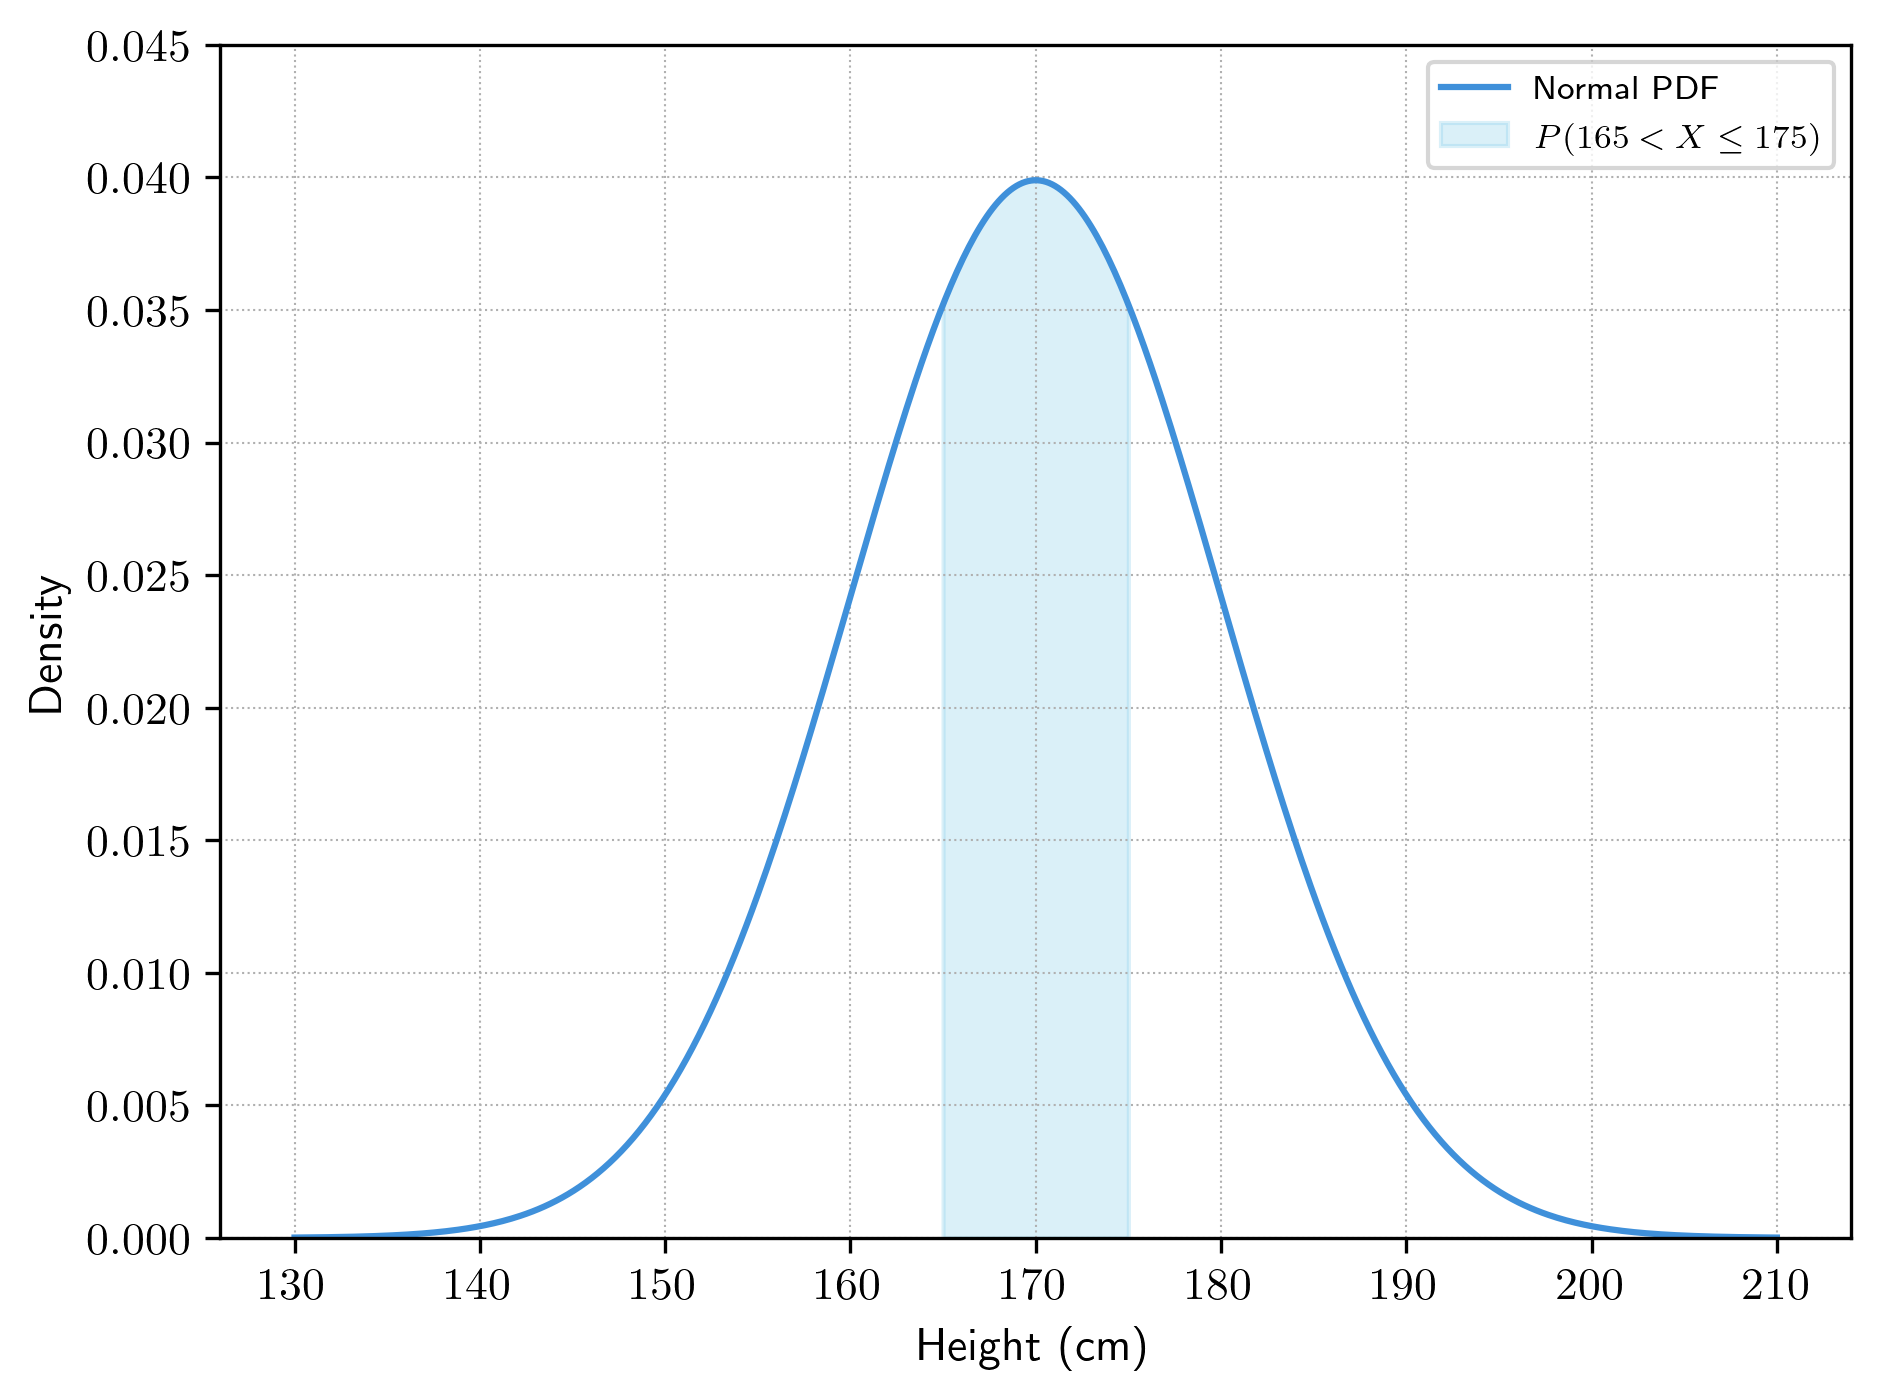

In [5]:
mu, sigma = 170, 10
x = np.linspace(130, 210, 500)
y = norm.pdf(x, loc=mu, scale=sigma)

plt.plot(x, y, label="Normal PDF")
x_fill = np.linspace(165, 175, 300)
y_fill = norm.pdf(x_fill, loc=mu, scale=sigma)
plt.fill_between(x_fill, y_fill, alpha=0.3, color='skyblue', label="$P(165 < X \\leq 175)$")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.ylim(0,0.045)
plt.legend(loc='upper right', prop={'size': 8})
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()
plt.close()

In [6]:
def lcg(seed, a, c, m, n):
    u = []
    x = seed
    for _ in range(n):
        x = (a * x + c) % m    # % is modulo operator
        u.append(x / m)   # normalizing to [0, 1)
    return u

seed = 42
a = 1664525
c = 1013904223
m = 2**32
n = 10

lcg(seed, a, c, m, n)

[0.2523451747838408,
 0.08812504541128874,
 0.5772811982315034,
 0.22255426598712802,
 0.37566019711084664,
 0.02566390484571457,
 0.4472812858875841,
 0.1184600037522614,
 0.8738137057516724,
 0.9946342753246427]

In [7]:
from scipy.stats import norm
import numpy as np

np.random.seed(42)
u = np.random.uniform(0, 1, 5) # 5 draws from Uniform(0,1) 
x = norm.ppf(u)                # convert to Normal(0,1)
print(x)

[-0.31985238  1.65181933  0.61885465  0.24987627 -1.01095644]


In [8]:
U = np.random.uniform(0, 1)
flip = 1 * (U > 0.5)

In [9]:
# sampling integers WITH replacement

np.random.seed(42)

n = 10  # integer range: 0 to n-1 (edges included)
k = 20  # sample size

# get k uniform random variables
u = np.random.uniform(0, 1, size=k) 

# multiply by n and round to the lower integer
samples = np.floor(n * u).astype(int)

print(samples) 

[3 9 7 5 1 1 0 8 6 7 0 9 8 2 1 1 3 5 4 2]


In [10]:
# sampling integers WITHOUT replacement

np.random.seed(42)

n = 10  # integer range: 0 to n-1 (edges included)
k = 5   # sample size

# get n uniform random variables 
# (a value for each possible integer)
u = np.random.uniform(0, 1, size=n) 

# get array of all possible unique integers
a = np.arange(n)

# random shuffle
# sort integers based on their associated uniform random values
a_sorted = a[np.argsort(u)]

# take the first k integers — sample without replacement
samples = a_sorted[:k]

print(samples)

[6 5 4 0 3]


In [11]:
np.random.seed(999) 
np.random.randn(4,2)  # 4 x 2 matrix of standard normal random variables

array([[ 0.12715784,  1.40189088],
       [ 0.31481499, -0.85844916],
       [-0.26613444, -0.64890071],
       [ 1.56626757, -2.09137019]])

In [12]:
np.random.seed(999)
mu = 0
sd = 1
np.random.normal(mu, sd, (4,2))

array([[ 0.12715784,  1.40189088],
       [ 0.31481499, -0.85844916],
       [-0.26613444, -0.64890071],
       [ 1.56626757, -2.09137019]])

In [13]:
mu_male = 175
sd = 8

np.random.seed(999)

heights_men = np.random.normal(mu_male, sd, 1000000)

In [14]:
np.sum(heights_men >= 185)/heights_men.shape[0]

np.float64(0.104927)

In [15]:
np.mean(heights_men >= 185)

np.float64(0.104927)

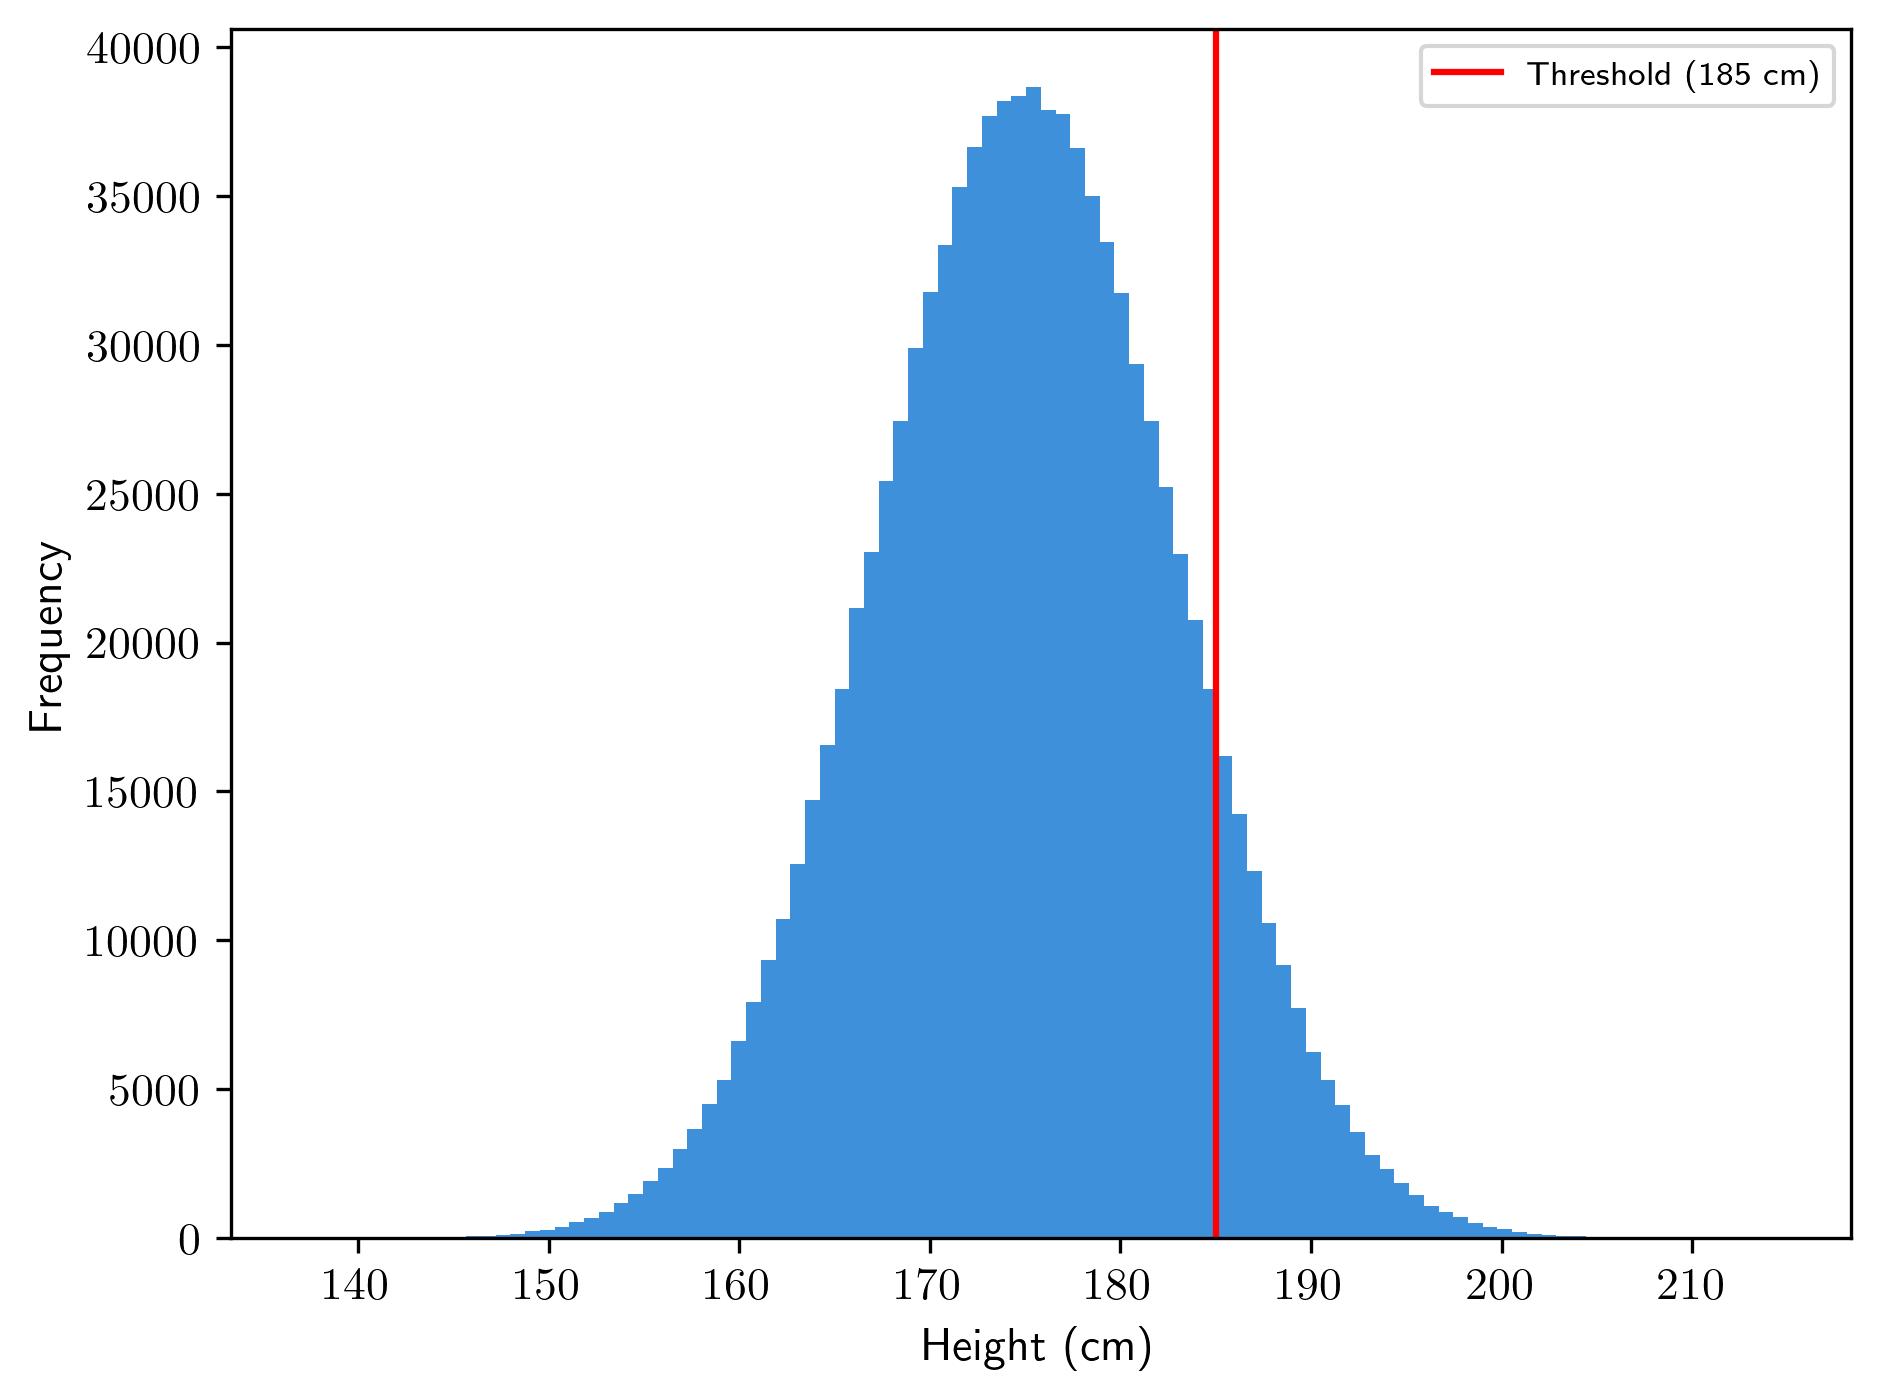

In [16]:
plt.hist(heights_men, bins=100)
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.axvline(x=185, color='r', label="Threshold (185 cm)")
plt.legend(prop={'size': 8})
plt.show()

In [17]:
mu_female = 161
heights_women = np.random.normal(mu_female, sd, 1000000)
heights = np.concatenate([heights_women, heights_men])
gender = np.concatenate([np.ones(1000000), np.zeros(1000000)]) # 1==female, 0==male
gender[heights > 185].mean()

np.float64(0.012814119993602349)

In [18]:
np.random.seed(999)
U = np.random.uniform(0, 1, (1000, 100))
X = np.mean(U,1)
print(X.shape)

(1000,)


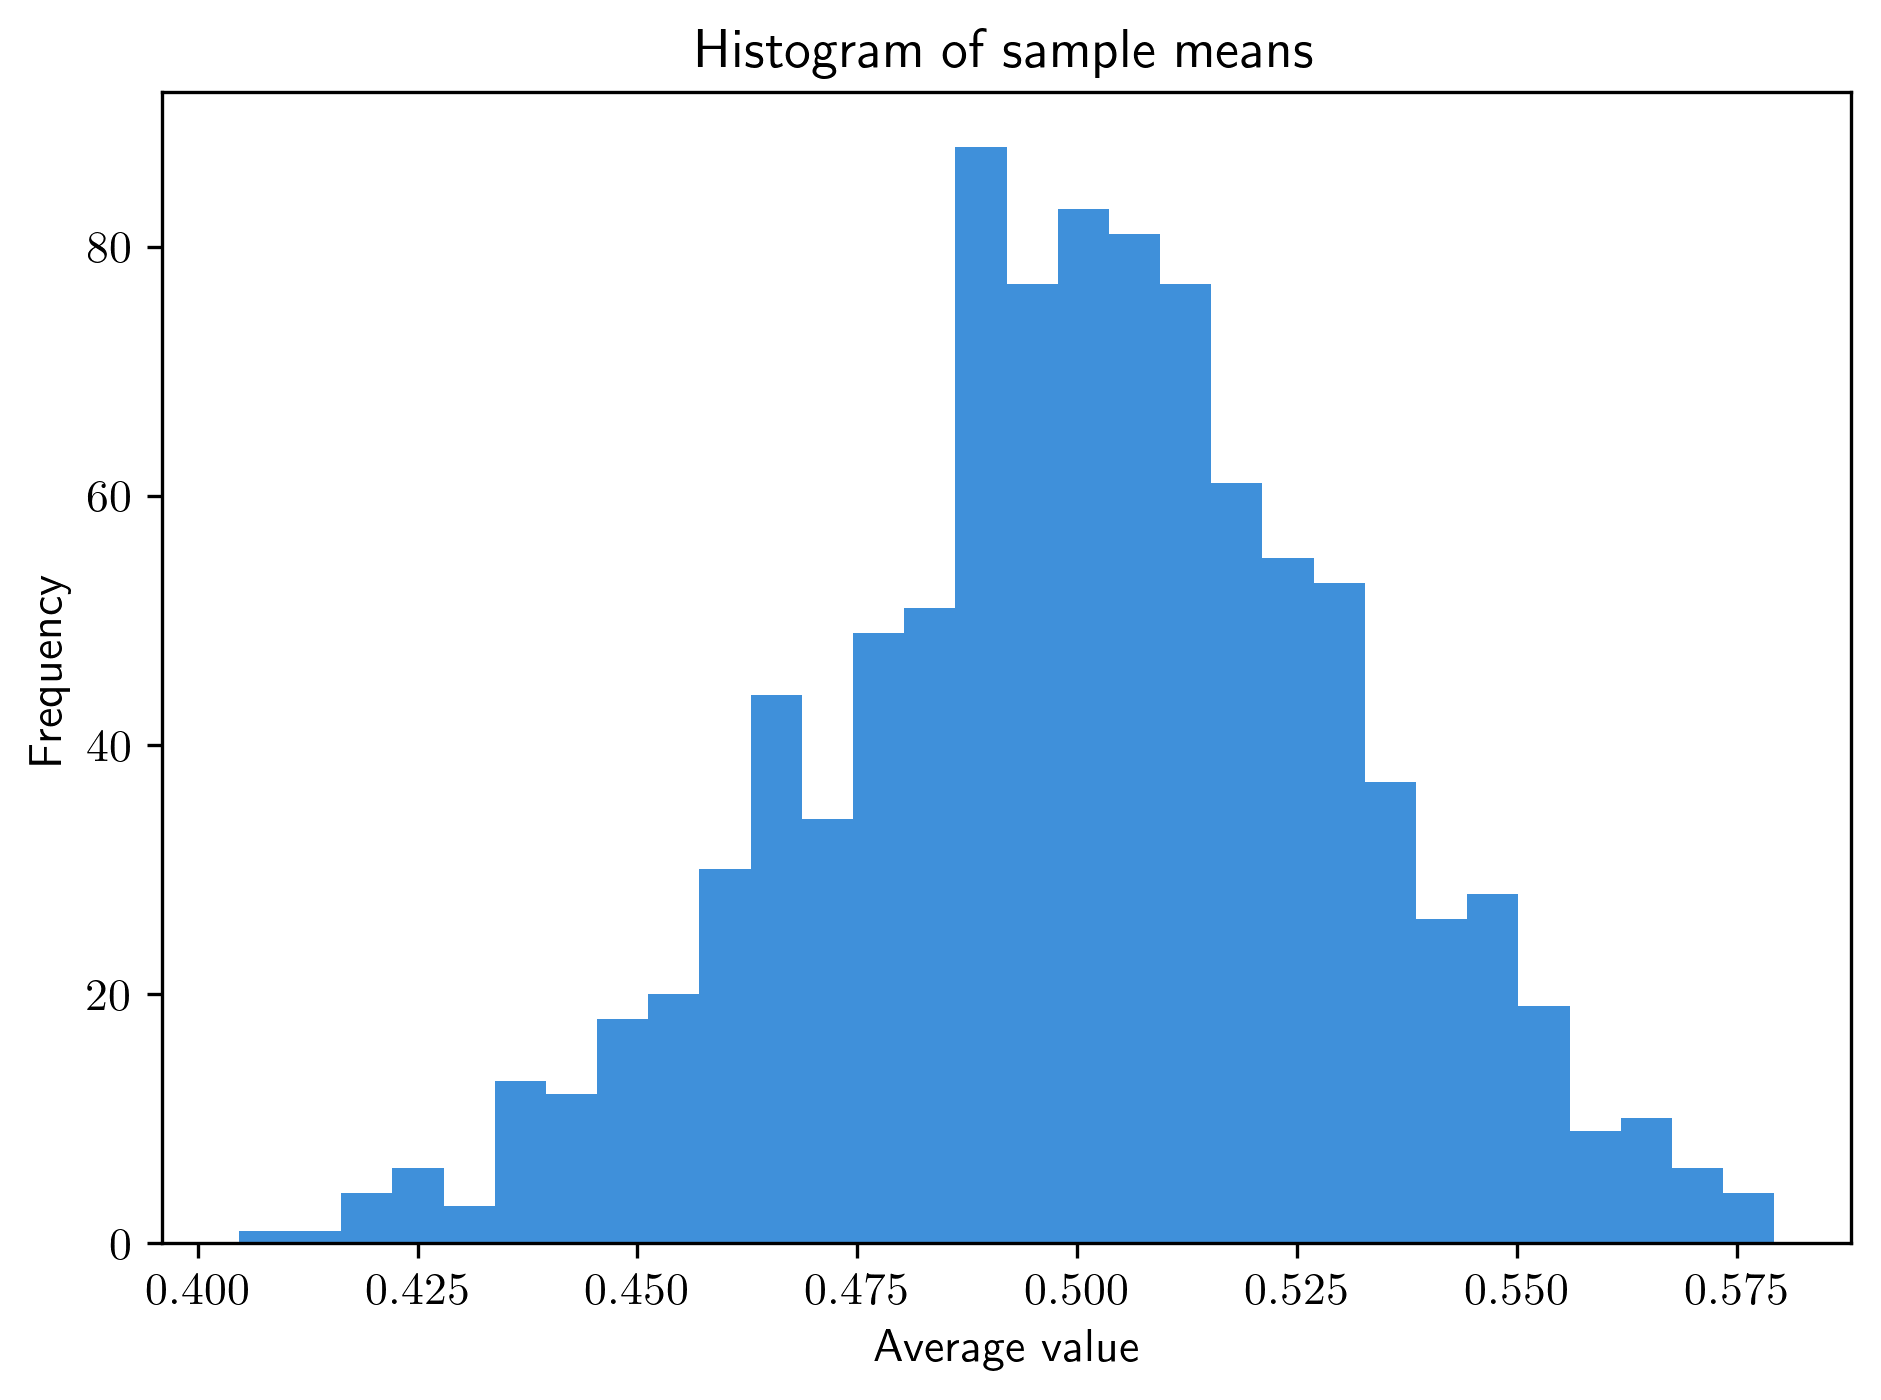

In [19]:
plt.hist(X, bins=30)
plt.xlabel("Average value")
plt.ylabel("Frequency")
plt.title("Histogram of sample means")
plt.show()

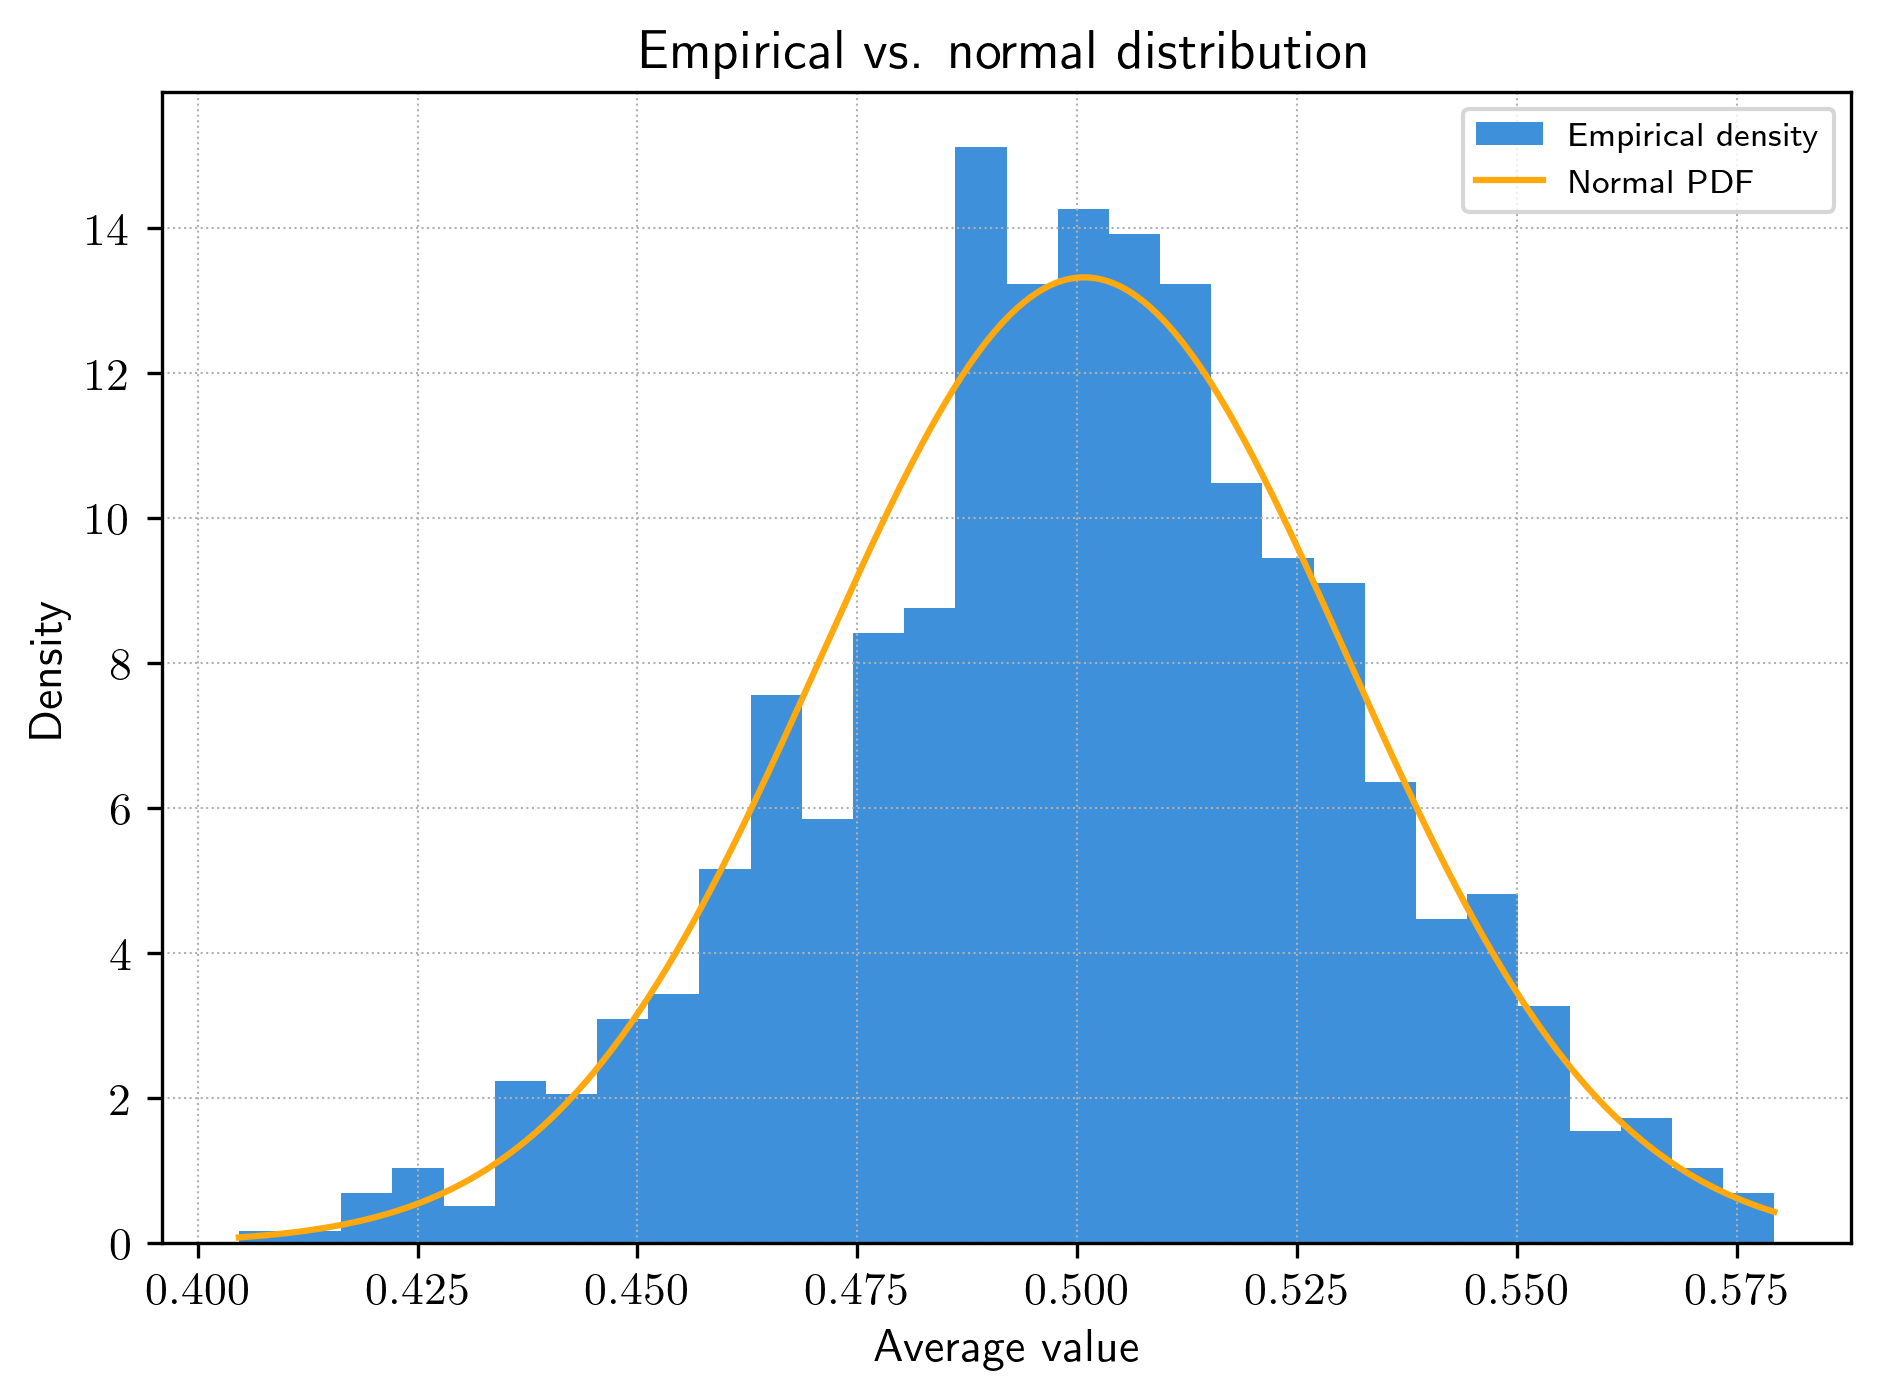

In [20]:
# relative frequency histogram
plt.hist(X, bins=30, density=True, label="Empirical density")

# normal PDF for comparison
x = np.linspace(X.min(), X.max(), 500)
y = norm.pdf(x, loc=X.mean(), scale=X.std())
plt.plot(x, y, label="Normal PDF")

plt.xlabel("Average value")
plt.ylabel("Density")
plt.title("Empirical vs. normal distribution")
plt.legend(loc='upper right', prop={'size': 8})
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()

In [21]:
np.random.seed(999)
n = 60 # group size
# sample a day of birth (from 365) for each person
# all days are assumed to be equally likely (not actually true in the real world)
birthdays = np.random.choice(365, n, replace=True) 
birthdays.reshape((6,-1)) # a single sample of birthdays in a group of 60 people

array([[348, 357, 200, 225, 217,  16, 117, 264, 136, 176],
       [ 69,  66,  11,  11, 149, 228, 250, 306, 318, 327],
       [358, 190, 115, 358,  43,  32, 105, 132,  13, 299],
       [ 84,  72, 238, 283,  23,  84, 133, 299, 337, 252],
       [216, 313, 177,  43, 257, 234, 206, 259, 364,   9],
       [250, 363,  78,  16, 127, 314,  31, 302,  52, 204]])

In [22]:
# check if two or more birthdays coincide -- i.e., we get a hit
def hit(b): 
    return 1.0*(np.unique(b).shape[0] < b.shape[0]) 

hit(birthdays)  # there is a hit! - some birthdays coincide

1.0

In [23]:
# simulate 10000 classrooms and measure proportion with at least one coincidence
hits = [hit(np.random.choice(365, n, replace=True)) for i in range(10000)] 
prob = np.mean(hits) # probability of at least one birthday coincidence
prob

np.float64(0.9948)

In [24]:
def prob_clash(n):
    hits = [hit(np.random.choice(365, n, replace=True)
               ) for i in range(10000)]
    prob = np.mean(hits)
    return prob

print("Group size: 22, Prob(coincidence):", prob_clash(22))
print("Group size: 23, Prob(coincidence):", prob_clash(23))

Group size: 22, Prob(coincidence): 0.4724
Group size: 23, Prob(coincidence): 0.51


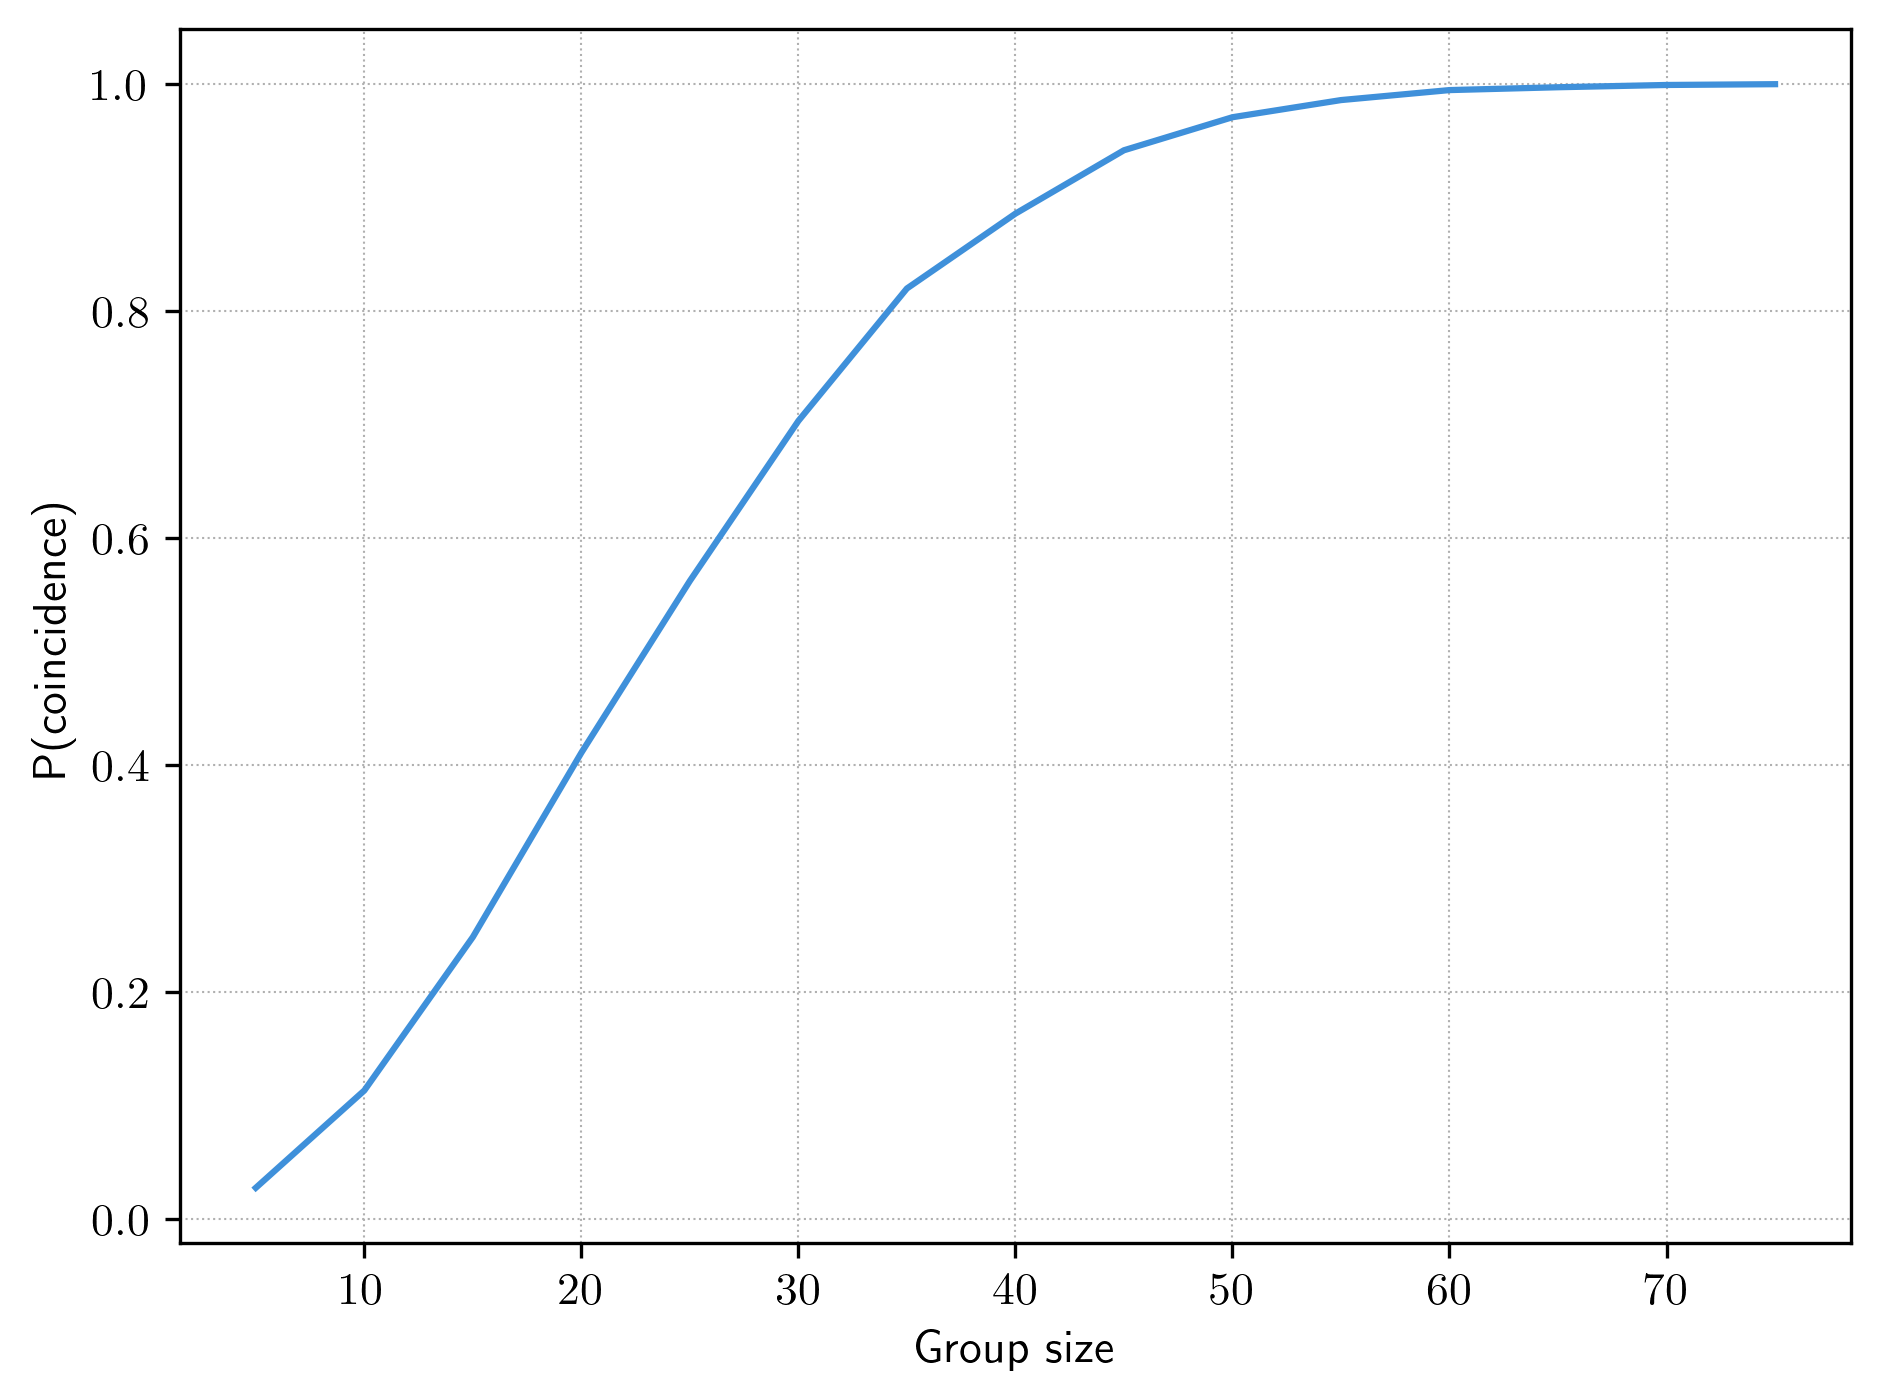

In [25]:
np.random.seed(999)
probs = [prob_clash(n) for n in range(5, 80, 5)]
plt.plot(range(5, 80, 5), probs) # group sizes between 5 and 80 in 5 int intervals
plt.xlabel("Group size")
plt.ylabel("P(coincidence)")
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()